# Homework ML Zoomcamp Week 4

## Data

In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

## Module

In [122]:
#import modules
import wget

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold 
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Import data

In [123]:
# Use wget
wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv')
# it gets downloaded in your folder then do
df  = pd.read_csv("AER_credit_card_data.csv")

#Check import
display(df.head())

100% [..............................................................................] 73250 / 73250

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


## Preparation

Create the target variable by mapping yes to 1 and no to 0.

Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

In [124]:
# Map yes - 1, no - 0
df['target'] = df['card'].map({'yes': 1, 'no': 0})

# Check mapping
display("old:", df['card'].value_counts(), 'new: ', df['target'].value_counts())

'old:'

yes    1023
no      296
Name: card, dtype: int64

'new: '

1    1023
0     296
Name: target, dtype: int64

In [125]:
# Define seed
seed = 1

# Split dataset

df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = seed)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state=seed)

# Check split
display(len(df_train_full), len(df_test), len(df_train), len(df_val))

# Reset indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Define target
y_train = df_train['target'].values
y_val = df_val['target'].values
y_test = df_test['target'].values

# Delete target from dataframe

df_train = df_train.drop(['card', 'target'], axis = 1)
df_test = df_test.drop(['card', 'target'], axis = 1)
df_val = df_val.drop(['card', 'target'], axis = 1)

#display(df_train.columns)


1055

264

791

264

## Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

For each numerical variable, use it as score and compute AUC with the card variable.

Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?
- reports
- dependents
- active
- share

In [126]:
# Get info about variable type
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
 12  target       1319 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 134.1+ KB


None

In [127]:
# Define numerical_columns
cols_num = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']

auc_score_nums = {}

# Calculate roc_auc_score
for col in cols_num:
    auc_sc = roc_auc_score(y_train, df_train[col])
    auc_score_nums[col] = round(auc_sc,4)
    
display(auc_score_nums)

{'reports': 0.2833,
 'age': 0.476,
 'income': 0.5908,
 'share': 0.9892,
 'expenditure': 0.991,
 'dependents': 0.4672,
 'months': 0.4706,
 'majorcards': 0.5344,
 'active': 0.6043}

In [128]:
auc_score_nums2 = {}

# Colculate roc_auc_score again with negative sign for cols with auc < 0.5
for col in cols_num:
    if auc_score_nums[col]<0.5:
        auc_sc = roc_auc_score(y_train, -df_train[col])
    else:
        auc_sc = roc_auc_score(y_train, df_train[col])
    auc_score_nums2[col] = round(auc_sc,4)
    
display(auc_score_nums2)

{'reports': 0.7167,
 'age': 0.524,
 'income': 0.5908,
 'share': 0.9892,
 'expenditure': 0.991,
 'dependents': 0.5328,
 'months': 0.5294,
 'majorcards': 0.5344,
 'active': 0.6043}

The numerical variable 'expenditure' has the hightes auc. From the list 'share' has the hightes value.

## Training the model
From now on, use these columns only:

["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [129]:
# Define features

col_feat = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [130]:
# One-hot-encoding
train_dicts = df_train[col_feat].to_dict(orient='records')
dv = DictVectorizer(sparse = False) 
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[col_feat].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [131]:
# Train Logisitc Regression

lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [132]:
# Predict y_pred
y_pred = lr.predict_proba(X_val)[:,1]
# Calculate auc
auc = roc_auc_score(y_val, y_pred)

display('AUC of this model on validation dataset is:', round(auc, 3))

'AUC of this model on validation dataset is:'

0.995

## Question 3
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01

For each threshold, compute precision and recall

Plot them

At which threshold precision and recall curves intersect?

In [133]:
# Evaluate model on different thresholds

scores=[]

# Calculate fp, tp, tn, fn for every thershold

for trs in np.linspace(0.0, 1.0, 101): 
    
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= trs)
    predict_negative = (y_pred < trs)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((trs, tp, fp, fn, tn))



In [134]:
# Make dataframe out of results
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

# Calculate precision: TP / (TP + FP)
df_scores['precision'] = df_scores['tp'] / (df_scores['fp']+df_scores['tp'])

# Calculate recall: TP / (FN + TP)
df_scores['recall'] = df_scores['tp'] / (df_scores['fn']+df_scores['tp'])

#Check
#display(df_scores.head())

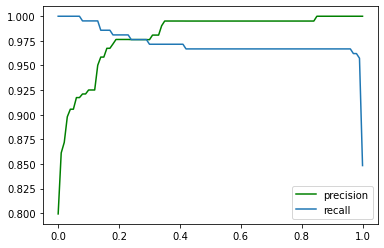

In [135]:
# Plot result
plt.plot(df_scores['threshold'], df_scores['precision'], label = 'precision',c='green');
plt.plot(df_scores['threshold'], df_scores['recall'], label = 'recall');
plt.legend();

In [136]:
# Show intersection
display('Precsion and recall intersect at threshold:', df_scores.loc[df_scores['precision']==df_scores['recall'], ['threshold', 'precision', 'recall']])

'Precsion and recall intersect at threshold:'

,threshold,precision,recall
24,0.24,0.976303,0.976303
25,0.25,0.976303,0.976303
26,0.26,0.976303,0.976303
27,0.27,0.976303,0.976303
28,0.28,0.976303,0.976303
29,0.29,0.976303,0.976303


## Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [137]:
# Calculate F1
df_scores['F1'] = 2 * df_scores['precision'] * df_scores['recall'] / ( df_scores['precision'] + df_scores['recall'])

# Threshold with maximal F1
max = df_scores['F1'].max()
display('F1 max = ', max)
display('F1 is maximal at threshold:', df_scores[df_scores['F1']==max])

'F1 max = '

0.9832134292565947

'F1 is maximal at threshold:'

,threshold,tp,fp,fn,tn,precision,recall,F1
35,0.35,205,1,6,52,0.995146,0.971564,0.983213
36,0.36,205,1,6,52,0.995146,0.971564,0.983213
37,0.37,205,1,6,52,0.995146,0.971564,0.983213
38,0.38,205,1,6,52,0.995146,0.971564,0.983213
39,0.39,205,1,6,52,0.995146,0.971564,0.983213
40,0.40,205,1,6,52,0.995146,0.971564,0.983213
41,0.41,205,1,6,52,0.995146,0.971564,0.983213


## Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

Iterate over different folds of df_full_train

Split the data into train and validation

Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

In [138]:
# Define function for data preparation
def data_prep(df_func):
    df_func = df_func.reset_index(drop=True)
    
    y_prep = df_func['target'].values
    
    df_func = df_func.drop(['card', 'target'], axis = 1)
    
    df_dicts = df_func[col_feat].to_dict(orient='records')   
            
    return df_dicts, y_prep

In [139]:
# Define KFold
kf = KFold(n_splits = 5, shuffle = True, random_state =seed)

scores=[]

# Iteration over different folds
for train_idx, val_idx in kf.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    
    df_train_dicts, y_train = data_prep(df_train)
    df_val_dicts, y_val = data_prep(df_val)
    
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(df_train_dicts)
    X_val = dv.transform(df_val_dicts)
    
    lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict_proba(X_val)[:, 1]
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
display('Results of KFold:', scores, 'Mean:', np.mean(scores), 'Standard deviation', round(np.std(scores), 3))

'Results of KFold:'

[0.9941860465116279,
 0.9941176470588236,
 0.9943346508563901,
 0.9996107939802803,
 1.0]

'Mean:'

0.9964498276814243

'Standard deviation'

0.003

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 1, 10]

Initialize KFold with the same parameters as previously

Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)

Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

0.01
0.1
1
10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [141]:
# Iterate over C and KFold

mean_scores = {}

for C in  [0.01, 0.1, 1, 10]:
    scores=[]

    # Iteration over different folds
    for train_idx, val_idx in kf.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
    
        df_train_dicts, y_train = data_prep(df_train)
        df_val_dicts, y_val = data_prep(df_val)
    
        dv = DictVectorizer(sparse = False)
        X_train = dv.fit_transform(df_train_dicts)
        X_val = dv.transform(df_val_dicts)
    
        lr = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        lr.fit(X_train, y_train)
    
        y_pred = lr.predict_proba(X_val)[:, 1]
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    mean_scores[C] = [round(np.mean(scores), 3), round(np.std(scores), 3)]
    
display(mean_scores)
    

{0.01: [0.992, 0.006],
 0.1: [0.995, 0.004],
 1: [0.996, 0.003],
 10: [0.996, 0.003]}